In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_process import load_calculation_data
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
h = cosmos.H0.value/100

In [2]:
z = 0
scale_factor = cosmos.Om(z) * cosmos.critical_density(z).to('M_sun/pc^3').value / h**2 * 1e6

In [3]:
r_p, _ = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_all_CMB_smoothed_6_tree.npy', return_rp=True)

In [4]:
jackknife_auto = np.load('./auto_corr_jackknife_kmeans_100.npy')
jackknife_cross = np.load('./cross_corr_jackknife_kmeans_100.npy')
jackknife_cross/=scale_factor
jackknife_all = np.concatenate((jackknife_cross, jackknife_auto), axis=1)
cov = np.cov(jackknife_all, rowvar=False, ddof=0)
cov *= (jackknife_all.shape[0] - 1)
std = np.sqrt([cov[i,i] for i in range(len(cov))])
cov_normed = cov / (std.reshape((-1, 1)) @ std.reshape((1, -1)))

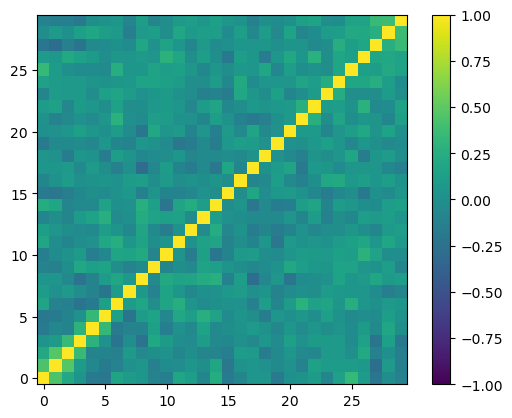

In [17]:
plt.imshow(cov_normed, origin='lower', vmin=-1, vmax=1)
plt.colorbar()

In [5]:
w_auto = jackknife_auto.mean(axis=0)
w_cross = jackknife_cross.mean(axis=0)
std_auto = std[len(w_cross):]
std_cross = std[:len(w_cross)]

In [24]:
np.save('../mcmc/python/signal', [r_p, w_auto, w_cross])

In [23]:
np.save('../mcmc/python/cov', cov)

[]

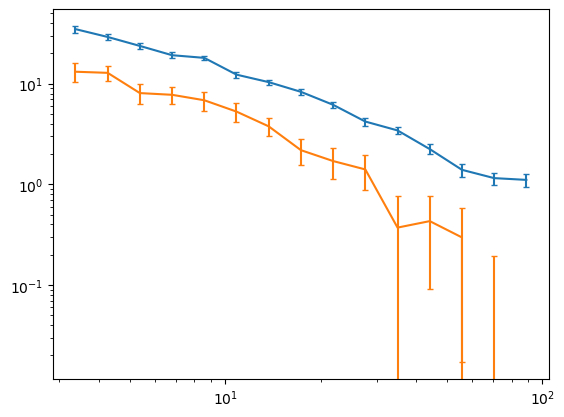

In [10]:
plt.errorbar(r_p, w_cross, std_cross, capsize=2)
# plt.ylim(bottom=1e-2)
plt.loglog()

[]

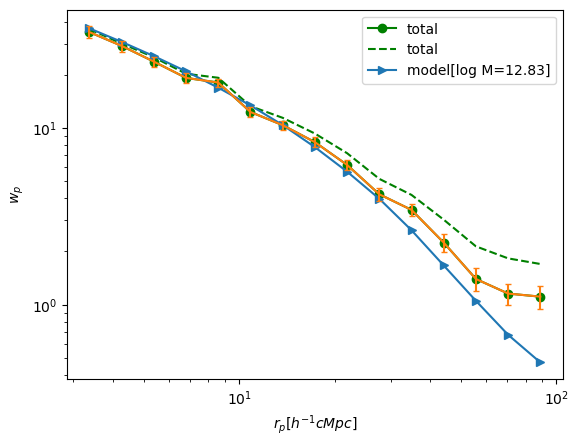

In [9]:
import os
os.chdir('./auto_corrs')

with open('auto_corr_corrfunc_h.npy', 'rb') as f:
    rp = np.load(f)
    wp_corrfunc_h = np.load(f)
with open('auto_corr_corrfunc_l.npy', 'rb') as f:
    _ = np.load(f)
    wp_corrfunc_l = np.load(f)

with open('auto_corr_corrfunc_h_nosys.npy', 'rb') as f:
    rp = np.load(f)
    wp_corrfunc_h_nosys = np.load(f)
with open('auto_corr_corrfunc_l_nosys.npy', 'rb') as f:
    _ = np.load(f)
    wp_corrfunc_l_nosys = np.load(f)

with open('auto_corr_corrfunc.npy', 'rb') as f:
    _ = np.load(f)
    wp_corrfunc = np.load(f)
with open('auto_corr_corrfunc_nosys.npy', 'rb') as f:
    _ = np.load(f)
    wp_corrfunc_nosys = np.load(f)

wp_thoery = np.load('predict.npy')[:,1]

os.chdir('..')
plt.plot(rp, wp_corrfunc_h, 'r-', label='h')
plt.plot(rp, wp_corrfunc_l, 'b-', label='l')
plt.plot(rp, wp_corrfunc_h_nosys, 'r--', label='h nosys')
plt.plot(rp, wp_corrfunc_l_nosys, 'b--', label='l nosys')

plt.plot(rp, wp_corrfunc, 'g-', label='total')

plt.plot(rp, wp_corrfunc_nosys, 'g--', label='total')

plt.plot(rp, wp_thoery, '>-', label='model[log M=12.83]')

plt.errorbar(r_p, w_auto, std_auto, capsize=2)

plt.xlabel('$r_p[h^{-1}cMpc]$')
plt.ylabel('$w_p$')

plt.legend()
plt.loglog()

In [25]:
w_auto

array([34.92433861, 29.18401384, 23.7690072 , 19.22055497, 18.08487522,
       12.32015006, 10.37770668,  8.31342483,  6.17624694,  4.21040142,
        3.43677963,  2.24202599,  1.39500281,  1.15363815,  1.10795549])